In [1]:
from collections import Counter
import pandas as pd
import json
import csv

country_name_tran_dict = {'United States':'the United States','Korea':'South Korea','the Congo':'Congo','DR Congo':'The Democratic Republic of Congo',
                          'Congo Brazzaville':'The Democratic Republic of Congo','St. Lucia':'Saint Lucia'}

zhuan_dict = {"The Democratic Republic of Congo":"Democratic Republic of the Congo",
              "Congo":"Republic of the Congo",
              "Bahamas":"The Bahamas",
              "the Comoros":"Comoros",
              "Eswatini":"eSwatini",
              "Côte d'Ivoire":"Cote d'Ivoire",
              "Micronesia":'Micronesia, Fed. St. ',
              "Serbia":"Republic of Serbia",
              "Tanzania":"United Republic of Tanzania",
              "Türkiye":"Turkey",
              "Antigua and Barbuda":"Antigua & Barbuda ",
              "Saint Kitts and Nevis":"Saint Kitts & Nevis",
              "the United States":"United States of America",
              "Sao Tome and Principe":"Sao Tome & Principe",
              "Timor-Leste":"East Timor",
              }

def country_name_tran(country_name):
    if country_name in country_name_tran_dict:
        return country_name_tran_dict[country_name]
    else:
        return country_name
    
def country_name_tran_to_geomap(country_name):
    country_name = country_name_tran(country_name)
    if country_name in zhuan_dict:
        return zhuan_dict[country_name]
    else:
        return country_name


#时间戳转变 2000-2023
def convert_date_format(date_str):
    try:
        # 尝试将输入的字符串解析为日期
        date = pd.to_datetime(date_str, format='%Y-%m')
        # 确保日期在 2000 年到 2023 年之间
        if 2000 <= date.year <= 2023:
            # 将日期格式化为 'MM/YYYY' 形式
            formatted_date = date.strftime('%m/%Y')
            return formatted_date
        else:
            return None
    except ValueError:
        # 如果解析失败，则返回 None
        return None
    
country_shijieditu = []

chudu = {}
rudu = {}

# 创建一个空列表来保存第一列的数据
first_column = []

with open('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/Geographical name_normalization.csv', 'r', newline='', encoding='utf-8') as csvfile:
    # 使用 csv.reader 读取 CSV 文件
    csv_reader = csv.reader(csvfile)
    # 逐行读取 CSV 文件
    for row in csv_reader:
        # 将每一行的第一列数据添加到列表中
        first_column.append(row[0])

path_file = '/home/qiuyang/workplace/swift/examples/pytorch/llm/my_data/data/c4_data_duiqi/total_data_v1.0.json'

with open(path_file, 'r') as input_file:
    # 逐行读取文件内容
    for line in input_file:
        # 解析JSON数据
        data = json.loads(line)

        origin = country_name_tran_to_geomap(data['origin'])
        destination = country_name_tran_to_geomap(data['destination'])
        if origin in first_column and destination in first_column:
            if origin in chudu:
                chudu[origin] = chudu[origin] + 1
            else:
                chudu[origin] = 1
            if destination in rudu:
                rudu[destination] = rudu[destination] + 1
            else:
                rudu[destination] = 1
            
    
common_keys = []
for key in rudu.keys():
    if key in chudu:
        common_keys.append(key)

common_key2 = []
for key in common_keys:
    if key != 'Micronesia, Fed. St. ':
        common_key2.append(key)
common_keys = common_key2

print(len(common_keys))
print(common_keys)

chudu_hot = {}
rudu_hot = {}

with open(path_file, 'r') as input_file:
    # 逐行读取文件内容
    for line in input_file:
        # 解析JSON数据
        data = json.loads(line)

        origin = country_name_tran_to_geomap(data['origin'])
        destination = country_name_tran_to_geomap(data['destination'])
        if origin in common_keys and destination in common_keys:
            if origin in chudu_hot:
                chudu_hot[origin] = chudu_hot[origin] + 1
            else:
                chudu_hot[origin] = 1
            if destination in rudu_hot:
                rudu_hot[destination] = rudu_hot[destination] + 1
            else:
                rudu_hot[destination] = 1

in_country = []
out_country = []


for country in common_keys:
    in_count = rudu_hot[country]
    out_count = chudu_hot[country]
    count = in_count - out_count
    if count > 0:
        in_country.append(country)
    else:
        out_country.append(country)

print(len(in_country))
print(len(out_country))

csv_list = in_country +  out_country 

count_dict = {}
for country in csv_list:
    count_dict[country] = {}
    for csv_country in csv_list:
        count_dict[country][csv_country] = 0

print(count_dict)

# for key,value in chudu_hot.items():
#     if value == 0:
#         print(key)

# for key,value in rudu_hot.items():
#     if value == 0:
#         print(key)


with open(path_file, 'r') as input_file:
    # 逐行读取文件内容
    for line in input_file:
        # 解析JSON数据
        data = json.loads(line)

        origin = country_name_tran_to_geomap(data['origin'])
        destination = country_name_tran_to_geomap(data['destination'])
        if origin in common_keys and destination in common_keys:
            count_dict[origin][destination] = count_dict[origin][destination] + 1

for key,value in count_dict.items():
    sum = 0
    for key1,value1 in value.items():
        sum = sum + value1
    if sum == 0:
        print(key)


def linear_mapping(input_value, min_value, max_value):
    """
    将输入值映射到 0 到 1 的范围
    """
    mapped_value = (input_value - min_value) / (max_value - min_value)
    return mapped_value



224
['Bangladesh', 'United States of America', 'China', 'Romania', 'Venezuela', 'Philippines', 'Uganda', 'Cyprus', 'Canada', 'Germany', 'Czechia', 'Lebanon', 'Australia', 'Brazil', 'Russia', 'Lesotho', 'Vietnam', 'New Zealand', 'Syria', 'Japan', 'United Kingdom', 'France', 'Cameroon', 'Solomon Islands', 'Hong Kong', 'Egypt', 'Ireland', 'Spain', 'Italy', 'Kenya', 'Austria', 'United Republic of Tanzania', 'Israel', 'Thailand', 'Oman', 'Palestine', 'Singapore', 'Saudi Arabia', 'Ukraine', 'Argentina', 'United Arab Emirates', 'Nicaragua', 'Latvia', 'Greece', 'South Korea', 'Madagascar', 'Burma', 'Seychelles', 'Chile', 'Sri Lanka', 'Cuba', 'Cambodia', 'Marshall Islands', 'Kuwait', 'South Africa', 'Jamaica', 'Sweden', 'Kazakhstan', 'Mali', 'Turkey', 'Iceland', 'Switzerland', 'Montenegro', 'Armenia', 'Norway', 'Denmark', 'Portugal', 'India', 'Belize', 'Honduras', 'Republic of Serbia', 'Georgia', 'Mongolia', 'Botswana', 'Mexico', 'Pakistan', 'Indonesia', 'Colombia', 'Myanmar', 'Uruguay', 'Mozam

In [2]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['font.family']='Times New Roman' #please remove this line if font is not installed
plt.rcParams['font.sans-serif']='Times New Roman' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
from PyComplexHeatmap import *
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
print(pch.__version__)
from matplotlib.colors import LinearSegmentedColormap

df_corr = pd.read_csv("/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/draw_data/hotmap/data/mydata_hot/correlations_finish.csv",sep='\t',index_col=0)
df_ann = pd.read_csv("/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/draw_data/hotmap/data/mydata_hot/annotations_finish.csv",sep='\t')
# betas = pd.read_csv("/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/draw_data/hotmap/data/kycg_modules_betas.csv",sep='\t')
# print(betas)

ratio_country = {}

# 查看字典的键
keys = count_dict.keys()

# 将键视图转换为列表
keys_list = list(keys)

for country in keys_list:
    ratio_country[country] = 0
    in_count = rudu_hot[country]
    out_count = chudu_hot[country]
    result = round(in_count/(in_count+out_count),2)
    ratio_country[country] = result

print(ratio_country)


# cpg_std=betas.std().to_dict()
cpg_mean=ratio_country
df_ann.set_index('name',inplace=True)
df_ann.flowtype=df_ann.flowtype.astype(str)

df_ann=df_ann.loc[df_ann.flowtype.isin(['net inflow','level flow','net outflow'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]
df_ann['Mean']=df_ann.index.to_series().map(cpg_mean)

data=df_corr.stack().reset_index()
data.columns=['X','Y','Correlation']

data['flowtype']=data.X.map(df_ann.flowtype.to_dict())
data['countrytype']=data.X.map(df_ann.countrytype.to_dict())

# print(df_ann)
# for hm in keep_hm:
#     df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
#     data[hm]=data.X.map(df_ann[hm].to_dict())

# print(df_ann.shape)
# df_ann.head()

print(data['flowtype'])


1.7.4
{'United States of America': 0.56, 'China': 0.54, 'Uganda': 0.5, 'Cyprus': 0.64, 'Czechia': 0.5, 'Lebanon': 0.62, 'Lesotho': 0.61, 'Vietnam': 0.52, 'New Zealand': 0.51, 'Syria': 0.52, 'United Kingdom': 0.87, 'Cameroon': 0.51, 'Solomon Islands': 0.79, 'Hong Kong': 0.58, 'Austria': 0.55, 'United Republic of Tanzania': 0.54, 'Oman': 0.7, 'Palestine': 0.85, 'Ukraine': 0.64, 'United Arab Emirates': 0.99, 'Nicaragua': 0.59, 'Madagascar': 0.57, 'Seychelles': 0.77, 'Sri Lanka': 0.53, 'Cuba': 0.61, 'Cambodia': 0.72, 'Marshall Islands': 0.98, 'Kuwait': 0.6, 'Kazakhstan': 0.55, 'Mali': 0.56, 'Turkey': 0.58, 'Iceland': 0.51, 'Switzerland': 0.51, 'Montenegro': 0.75, 'Belize': 0.69, 'Republic of Serbia': 0.51, 'Mongolia': 0.61, 'Botswana': 0.58, 'Mozambique': 0.62, 'Papua New Guinea': 0.72, 'Cook Islands': 0.93, 'Costa Rica': 0.62, 'North Korea': 0.75, 'Jordan': 0.61, 'Bosnia and Herzegovina': 0.55, 'Rwanda': 0.52, 'Haiti': 0.57, 'Jersey': 0.63, 'Bermuda': 0.66, 'Belgium': 0.59, 'Tajikistan': 

/home/qiuyang/miniconda3/envs/python3.9/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:352: FutureWarning: The provided callable <function mean at 0x7fbfcc631e50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/qiuyang/miniconda3/envs/python3.9/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:393: FutureWarning: The provided callable <function mean at 0x7fbfcc631e50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["c"] = data.pivot_table(


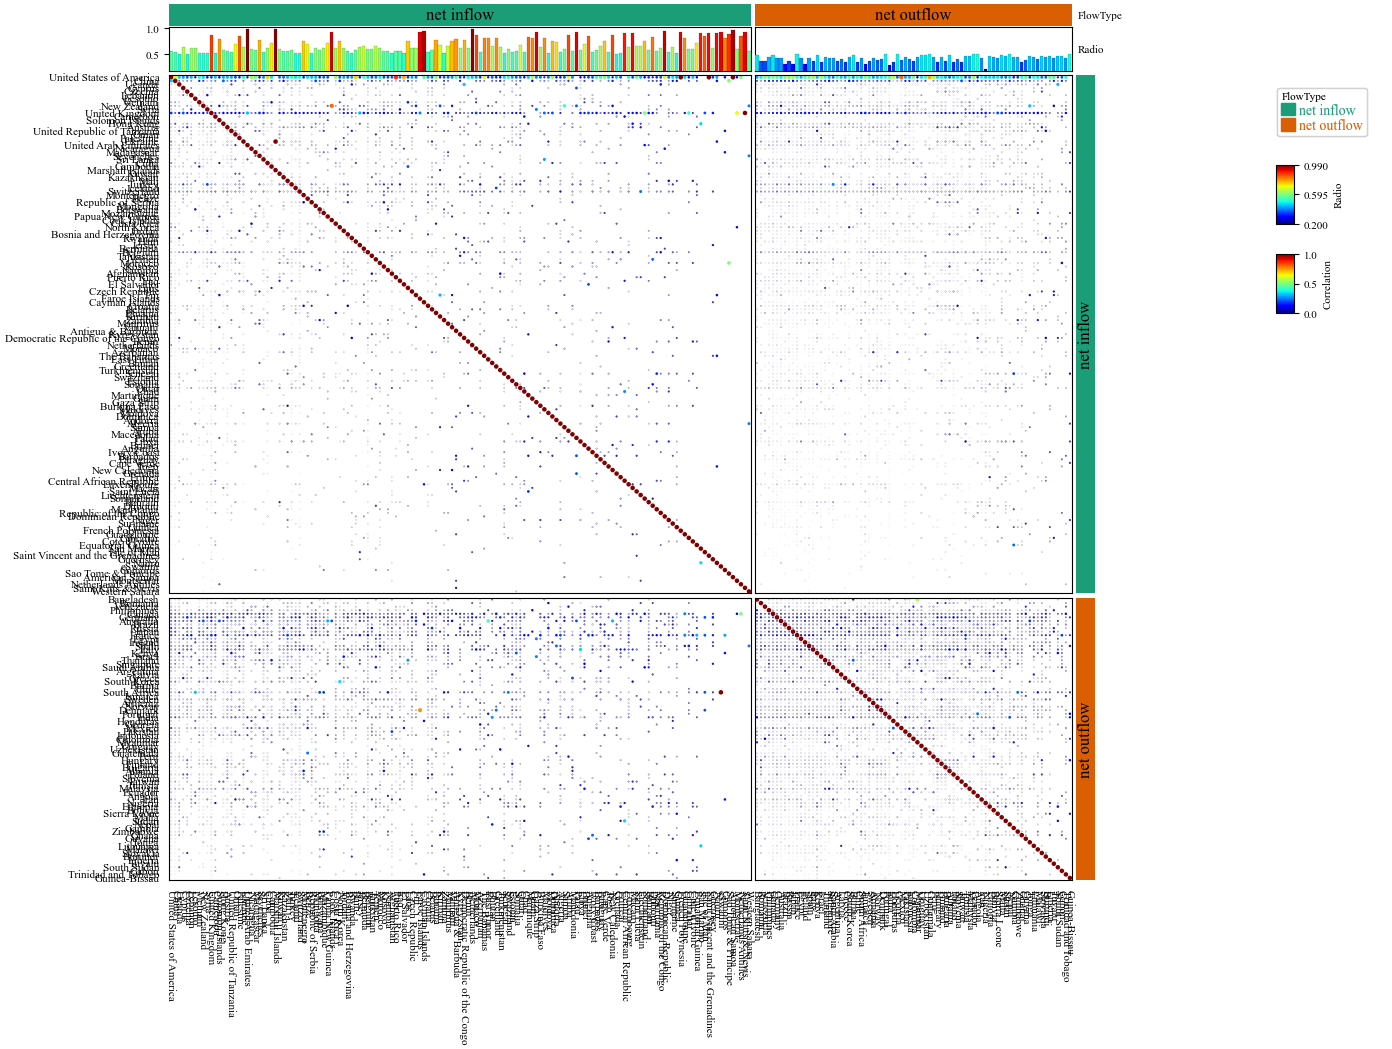

In [3]:
from pyecharts import options as opts
df_ann=df_ann.loc[df_ann.flowtype.isin(['net inflow','net outflow'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]

data=df_corr.stack().reset_index()

data.columns=['X','Y','Correlation']

#Module 是区块
data['flowtype']=data.X.map(df_ann.flowtype.to_dict())
#ChromHMM 是区块中的类型区分
data['countrytype']=data.X.map(df_ann.countrytype.to_dict())

# for i in data['Correlation']:
#     print(i)

data['Correlation'] = data['Correlation'].astype(float)


# #添加上四个列以及对应的01值
# keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3B']
# for hm in keep_hm:
#     df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
#     data[hm]=data.X.map(df_ann[hm].to_dict())

# for shu in data['Correlation']:
#     print(shu)

row_ha = pch.HeatmapAnnotation(
            FlowType=pch.anno_simple(df_ann.flowtype,cmap='Dark2',legend=True,height=5,
                              add_text=True,text_kws={'color':'black','fontsize':12}),
            axis=0,verbose=0,label_kws={'visible':False})
#label_kws={'visible':False}


# all_cmaps=matplotlib.pyplot.colormaps()
# if 'binarize' not in all_cmaps:
#     c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
#     try:
#         plt.register_cmap(cmap=c)
#     except:
#         matplotlib.colormaps.register(c, force=True)



col_ha = pch.HeatmapAnnotation(
            #label=pch.anno_label(df_col.ColGroup, merge=True,rotation=45),
            FlowType=pch.anno_simple(df_ann.flowtype,cmap='Dark2',legend=False,height=5,
                              add_text=True,text_kws={'color':'black','fontsize':12}),
            Radio=pch.anno_barplot(df_ann.Mean,cmap='jet',linewidth=0.1),
            verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

# plt.figure(figsize=(22, 20))
plt.figure(figsize=(12, 10))

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

# 设置matplotlib字体属性
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体系列为 Times New Roman
plt.rcParams['font.size'] = 8  # 设置字号为 3

cm = pch.DotClustermapPlotter(
            data=data, x='X',y='Y',value='Correlation',c='Correlation',
             cmap='jet',row_cluster=False,col_cluster=False,
            top_annotation=col_ha,right_annotation=row_ha,
            col_split=df_ann.flowtype,row_split=df_ann.flowtype, col_split_gap=1,row_split_gap=1,
            legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=7,spines=True)
#show_rownames=True
plt.savefig("dotClustermap2.pdf", bbox_inches='tight')
plt.show()


/home/qiuyang/miniconda3/envs/swift/lib/python3.11/site-packages/PyComplexHeatmap/dotHeatmap.py:352: FutureWarning: The provided callable <function mean at 0x7f5a2c3bf560> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/qiuyang/miniconda3/envs/swift/lib/python3.11/site-packages/PyComplexHeatmap/dotHeatmap.py:393: FutureWarning: The provided callable <function mean at 0x7f5a2c3bf560> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["c"] = data.pivot_table(


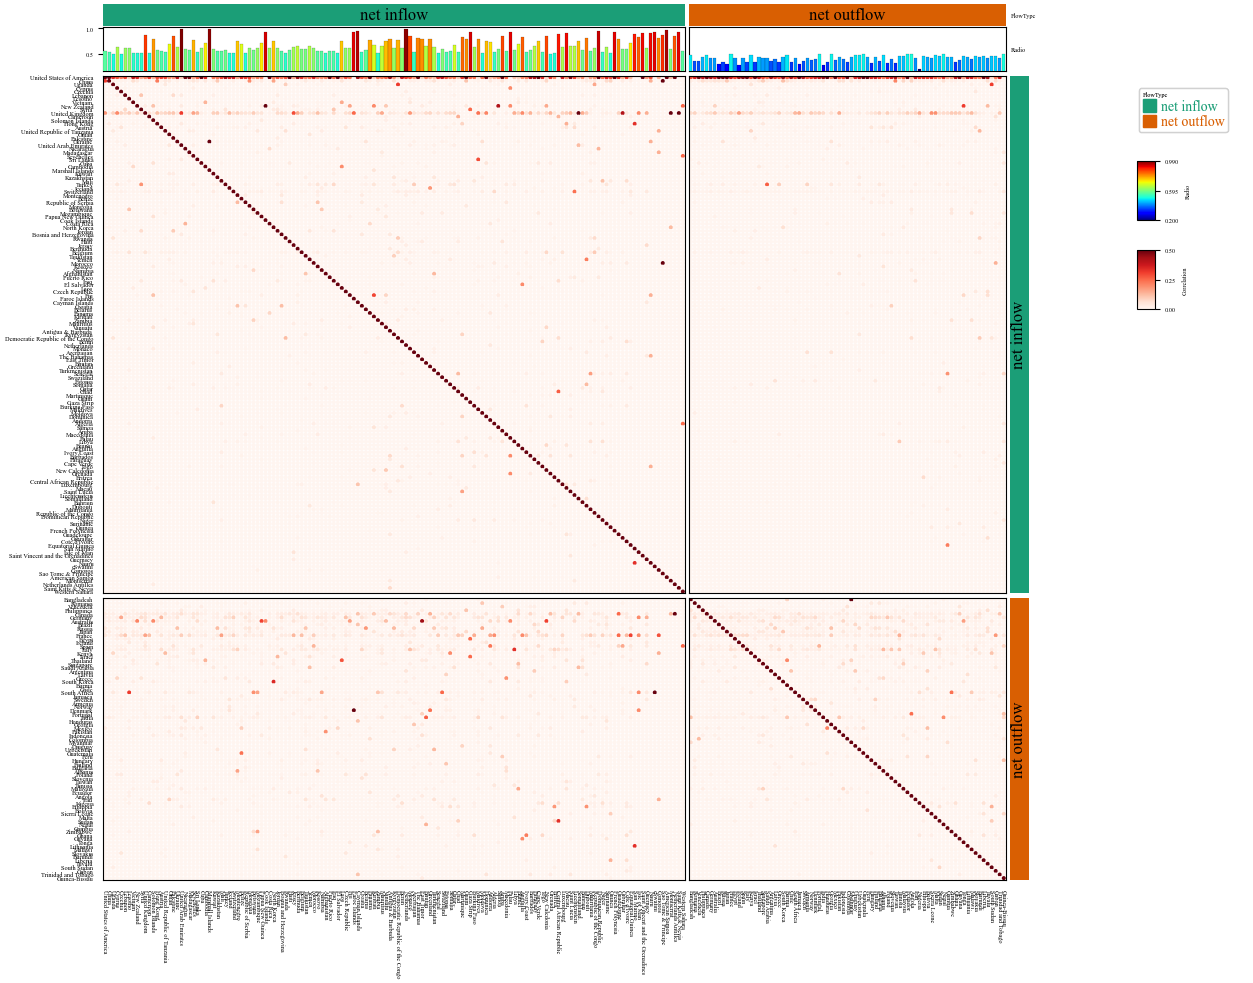

In [8]:
#用方形

import matplotlib.cm
from pyecharts import options as opts
df_ann=df_ann.loc[df_ann.flowtype.isin(['net inflow','net outflow'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]

data=df_corr.stack().reset_index()

data.columns=['X','Y','Correlation']

#Module 是区块
data['flowtype']=data.X.map(df_ann.flowtype.to_dict())
#ChromHMM 是区块中的类型区分
data['countrytype']=data.X.map(df_ann.countrytype.to_dict())

# for i in data['Correlation']:
#     print(i)

data['Correlation'] = data['Correlation'].astype(float)


# #添加上四个列以及对应的01值
# keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3B']
# for hm in keep_hm:
#     df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
#     data[hm]=data.X.map(df_ann[hm].to_dict())

# for shu in data['Correlation']:
#     print(shu)

row_ha = pch.HeatmapAnnotation(
            FlowType=pch.anno_simple(df_ann.flowtype,cmap='Dark2',legend=True,height=5,
                              add_text=True,text_kws={'color':'black','fontsize':12}),
            axis=0,verbose=0,label_kws={'visible':False})
#label_kws={'visible':False}


# all_cmaps=matplotlib.pyplot.colormaps()
# if 'binarize' not in all_cmaps:
#     c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
#     try:
#         plt.register_cmap(cmap=c)
#     except:
#         matplotlib.colormaps.register(c, force=True)



col_ha = pch.HeatmapAnnotation(
            #label=pch.anno_label(df_col.ColGroup, merge=True,rotation=45),
            FlowType=pch.anno_simple(df_ann.flowtype,cmap='Dark2',legend=False,height=5,
                              add_text=True,text_kws={'color':'black','fontsize':12}),
            Radio=pch.anno_barplot(df_ann.Mean,cmap='jet',linewidth=0.1),
            verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})


# plt.figure(figsize=(22, 20))
plt.figure(figsize=(12, 10))

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

# 设置matplotlib字体属性
plt.rcParams['font.family'] = 'Times New Roman'  # 设置字体系列为 Times New Roman
plt.rcParams['font.size'] = 4.5  # 设置字号为 3

cm = pch.DotClustermapPlotter(
            data=data, x='X',y='Y',value='Correlation',c='Correlation',
            hue='flowtype', row_cluster=False,col_cluster=False,cmap='Reds',
            top_annotation=col_ha,right_annotation=row_ha,vmax=0.5,vmin=0,s=0.7,
            col_split=df_ann.flowtype,row_split=df_ann.flowtype, col_split_gap=1,row_split_gap=1,
            legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=7,spines=True)
#show_rownames=True
plt.savefig("dotClustermap2.pdf", bbox_inches='tight')
plt.show()